<a href="https://colab.research.google.com/github/chaewoncutie/CCADMACL_EXERCISES_COM222ML/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

Netflix is the world's largest online streaming service provider, with over 220 million subscribers. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscribers from ending their subscription.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

## Instructions

1. Your task is to group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other. Use Principal Component Analysis and any Clustering Algorithm.

2. After creating the clusters, profile each cluster that you have created.

In [ ]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXERCISES/blob/353cd84703a9e313ee7ecf37fb97a067aa81ddbc/netflix.csv?raw=true")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


1. Apply dimensionality reduction using Principal Component Analysis
- Use the necessary number of principal components

In [ ]:
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)

numerical_features = df.select_dtypes(include=['number'])
numerical_features = numerical_features.fillna(numerical_features.mean())

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

pca = PCA()
pca.fit(scaled_data)

explained_variance_ratio_cumsum = pca.explained_variance_ratio_.cumsum()
n_components = len(explained_variance_ratio_cumsum[explained_variance_ratio_cumsum < 0.95]) + 1

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

2. Create a scree plot for each principal component

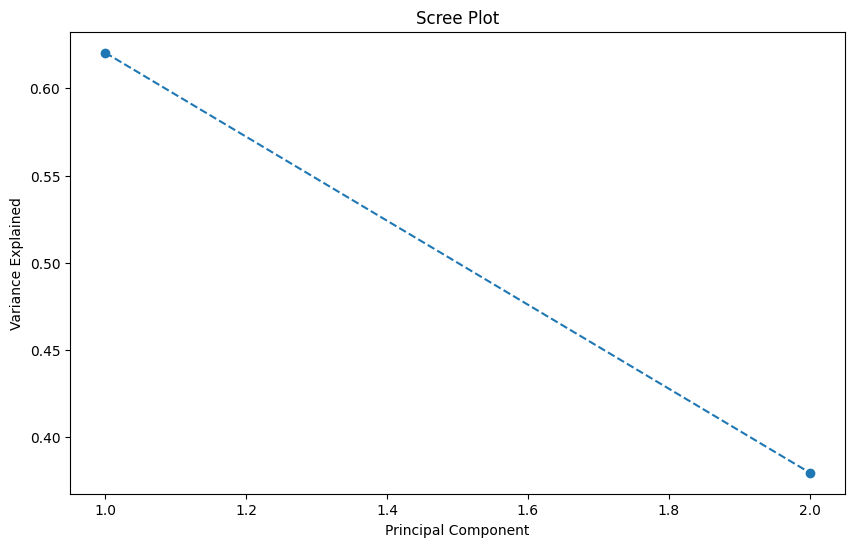

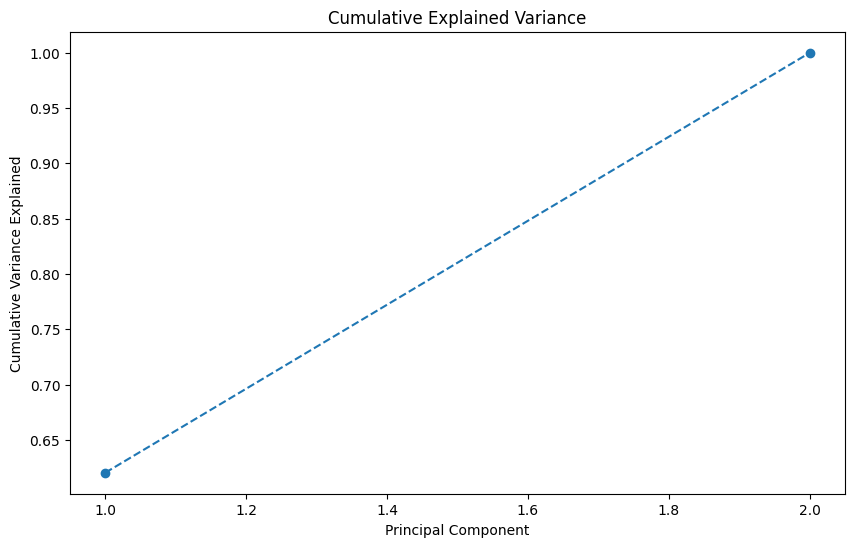

In [ ]:
# put your answer here
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')
plt.show()

3. Use any clustering algorithm to create clusters

In [ ]:
# put your answer here
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(principal_df)

df['Cluster'] = clusters

4. Profile each cluster that you have generated based on your experiments

In [ ]:
# put your answer here
cluster_profiles = df.groupby('Cluster').agg({
    'release_year': 'mean',
    'duration': 'mean',  # Now 'duration' is numeric
    # Add other numeric columns here as needed
})
print(cluster_profiles)

         release_year    duration
Cluster                          
0         2016.855731   86.005492
1         2016.743227    3.644680
2         2000.684593  107.393895
3         1973.132275  109.841270
4         2014.964461  122.210784
